In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_pickle('./data/final_df')

In [3]:
df.head()

,WindSpeedX,WindSpeedY,WindSpeedZ,Kp,ap,0,1,2,3,4,5,6,7,8,9
0,1.487795,-0.359055,-6.386987,3.579217,7.013861,-0.478411,5.327612,3.880516,1.496256,0.547225,0.290276,1.396452,-0.043085,-0.015895,0.263997
1,1.152662,-1.184712,-4.362110,3.035520,4.670888,-7.719191,-9.171954,-6.021901,-8.260704,-2.091493,-1.590709,-1.242020,1.314685,-0.516834,0.771276
2,1.479125,-1.773211,-3.120826,2.764079,3.889897,-7.922941,-9.369014,-5.844717,-8.099330,-2.344532,-1.963089,-1.132759,1.329882,-0.545749,0.923759
3,1.258180,-2.165994,1.479697,1.405243,0.961181,-0.725512,3.627122,0.693456,0.105023,1.731850,0.614801,1.022090,0.650107,0.184201,-0.386600
4,2.196549,-1.937583,-0.392775,0.047223,-0.210305,-7.963528,-9.560413,-5.621810,-7.833228,-2.178333,-2.433747,-1.084654,1.261405,-0.699100,1.024394


In [4]:
def create_train_window(valores, group_size=20):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(0, len(valores)-group_size-1):
        if(i < (len(valores)-group_size-1)*0.8):
            x_train.append(valores[i:group_size+i])
            y_train.append(valores[i+group_size][-2])
        else:
            x_test.append(valores[i:group_size+i])
            y_test.append(valores[i+group_size][-2])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [5]:
x_train, y_train, x_test, y_test = create_train_window(np.array(df), 40)
input_shape_w=np.shape(x_train[0])
input_shape_w

(40, 15)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=10,            # Number of epochs with no improvement before stopping
    verbose=1,              # Verbosity level (1 for updates, 0 for silent)
    restore_best_weights=True  # Restore the best weights when stopping
)

In [9]:
model = keras.Sequential()
model.add(layers.BatchNormalization())
model.add(layers.LSTM(256, input_shape=input_shape_w, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(128, return_sequences=False, dropout=0, recurrent_dropout=0))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# model.summary()

In [10]:
model.fit(x_train, y_train, shuffle=True, batch_size=32, epochs=50, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/50
300/300 [==============================] - 61s 171ms/step - loss: 0.6452 - accuracy: 0.0000e+00 - val_loss: 0.4527 - val_accuracy: 0.0000e+00
Epoch 2/50
300/300 [==============================] - 47s 155ms/step - loss: 0.5809 - accuracy: 0.0000e+00 - val_loss: 0.4203 - val_accuracy: 0.0000e+00
Epoch 3/50
300/300 [==============================] - 47s 155ms/step - loss: 0.5112 - accuracy: 0.0000e+00 - val_loss: 0.3575 - val_accuracy: 0.0000e+00
Epoch 4/50
300/300 [==============================] - 47s 158ms/step - loss: 0.4618 - accuracy: 0.0000e+00 - val_loss: 0.3245 - val_accuracy: 0.0000e+00
Epoch 5/50
300/300 [==============================] - 47s 158ms/step - loss: 0.4373 - accuracy: 0.0000e+00 - val_loss: 0.3210 - val_accuracy: 0.0000e+00
Epoch 6/50
300/300 [==============================] - 47s 158ms/step - loss: 0.4196 - accuracy: 0.0000e+00 - val_loss: 0.3078 - val_accuracy: 0.0000e+00
Epoch 7/50
300/300 [==============================] - 47s 158ms/step - loss: 0.413

In [11]:
y_prediction = model.predict(x_test)
print(mean_absolute_error(y_test,y_prediction))
print(mean_squared_error(y_test,y_prediction))

108/108 [==============================] - 6s 40ms/step
0.4100768649669275
0.3698870767738638


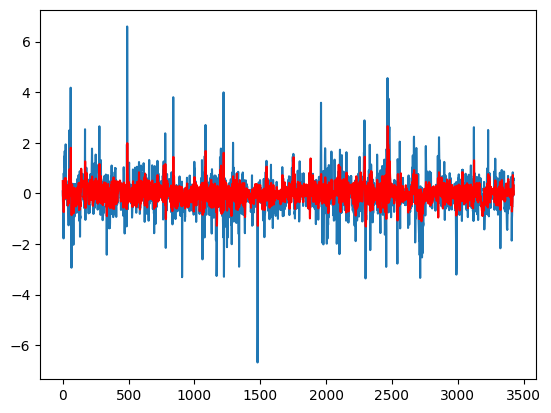

In [12]:
plt.plot(y_test)
plt.plot(y_prediction,c='r')

In [13]:
y_test

array([ 0.08221968, -0.36619327, -0.50219506, ...,  0.38621013,
        0.60825786,  0.54369992])